In [1]:
#%matplotlib inline
from matplotlib import style
style.use("fivethirtyeight")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect = True)

# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [6]:
 # save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# create the session
session = Session(engine)

In [8]:
# view the Measurement table columns
session.query(Measurement).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x206a4f6cca0>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1}

In [9]:
# view the Station table columns
session.query(Station).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x206a4f6cbe0>,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 1,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0}

## Exploratory Precipitation Analysis

In [10]:
# find the most recent date in the data set
latestRecord = dt.datetime.strptime(session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0], "%Y-%m-%d")
print(f"The latest record was on {latestRecord.year}-{latestRecord.month}-{latestRecord.day}.")

The latest record was on 2017-8-23.


In [11]:
# find one year before the latest record
lastYearThreshold = dt.datetime(latestRecord.year - 1, latestRecord.month, latestRecord.day, latestRecord.hour, latestRecord.minute, latestRecord.second)
print(f"One year before the latest record was on {lastYearThreshold.year}-{lastYearThreshold.month}-{lastYearThreshold.day}.")

One year before the latest record was on 2016-8-23.


In [29]:
# declare the lists
timestamp = []
precipitation = []

# get the previous year's records
for row in session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= lastYearThreshold):
    timestamp.append(dt.datetime.strptime(row[0], "%Y-%m-%d"))
    precipitation.append(row[1])

# construct the dataframe
precipitation_df = pd.DataFrame({
                "Date": timestamp,
                "Precipitation": precipitation})

# set the index
precipitation_df.set_index("Date", inplace = True, drop = True)

# convert to date values
precipitation_df.index = pd.to_datetime(precipitation_df.index).date

# sort by date and remove NaN values
precipitation_df = precipitation_df.sort_index(ascending = True).dropna()

# preview the dataframe
precipitation_df.head()

,Precipitation
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
2016-08-24,1.45


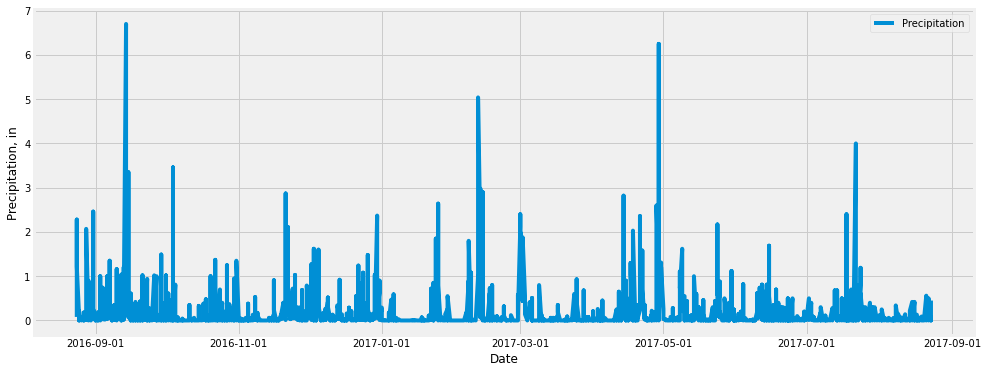

In [26]:
# plot the results
ax = precipitation_df.plot(xlabel = "Date", ylabel = "Precipitation, in", figsize = (15, 6))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.show()

In [28]:
# show the summary statistics
precipitation_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [34]:
# get the total number of stations in the dataset
stationCount = session.query(Station.id).order_by(Station.id.desc()).first()[0]
print(f"There are {stationCount} stations within this dataset.")

There are 9 stations within this dataset.


In [43]:
# get the most active stations
data = session.query(Station.station, Measurement.tobs).join(Station, Station.station == Measurement.station)

func.count(session.query(Station.station).join(Station, Station.station == Measurement.station))

# sel = [Station.station,
#         func.count(Station.station),
#         func.avg(Measurement.tobs),
#         func.max(Measurement.tobs),
#         func.min(Measurement.tobs)]

# session.query(*sel).all()


C:\Users\scott\AppData\Local\Temp\ipykernel_3128\1939465740.py:4: SAWarning: implicitly coercing SELECT object to scalar subquery; please use the .scalar_subquery() method to produce a scalar subquery.
  func.count(session.query(Station.station).join(Station, Station.station == Measurement.station))


<sqlalchemy.sql.functions.count at 0x206aa74b310; count>